# Aufgabenteil 3

Definition der Differentialgleichung

In [1]:
from sympy import *
u = Function('u')
var('x g')
equ = Eq(-diff(u(x),x,x), -g)
display(equ)

Eq(-Derivative(u(x), (x, 2)), -g)

Lösung der Differentialgleichung

In [2]:
sol = dsolve(equ.subs({g: 10}), u(x), ics = {u(0): 0, u(1): 0})
display(sol)

Eq(u(x), 5*x**2 - 5*x)

Darstellung der Lösung

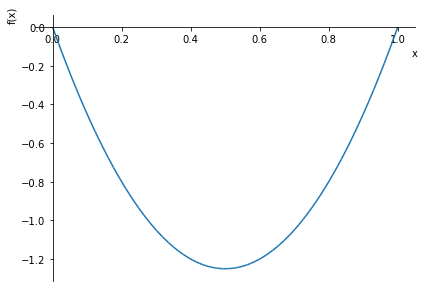

In [3]:
u_sol = sol.rhs
plotting.plot(u_sol, (x,0,1));

# Aufgabenteil 4

Definition der Differenzenquotienten und in einander einsetzen.

In [4]:
u = Function("u")
var('x h')
def diffop(a,b):
    return (b-a)/h
vdiff = diffop(u(x),u(x+h))
rdiff = diffop(u(x-h),u(x))
diff2 = diffop(vdiff, rdiff)
display(diff2)

(-(-u(x) + u(h + x))/h + (u(x) - u(-h + x))/h)/h

Vereinfachen

In [5]:
simplify(diff2)

(2*u(x) - u(-h + x) - u(h + x))/h**2

Da $u(x_i) = u_i$ und $x_{i\pm1} = x_i \pm h$ ist, können wir $u(x)$ mit $u_i$ und $u(x\pm h)$ mit $u_{i\pm 1}$ ersetzen.

Da wir den negativen Differentialoperator 2. Grades betrachten noch mit $-1$ multiplizieren. Dies ergibt dann:

In [6]:
u_i, u_1i, u_i1 = symbols('u_i u_{i-1} u_{i+1}')
display(simplify((-1)*diff2.subs(u(x), u_i).subs(u(x+h), u_i1).subs(u(x-h), u_1i)))

(-2*u_i + u_{i+1} + u_{i-1})/h**2

Dies entspricht der Multiplikation eines Vektors $u$ mit der Matrix $M$.

Erzeugung des Gitters

In [7]:
import numpy as np
N = 100
h = 1/N
x_values = np.arange(h,1,h)

Lösung des LGS

In [8]:
from scipy.linalg import solve
M = (N**2) * (2*np.eye(N-1,N-1) - np.diag(np.ones(N-2),1) - np.diag(np.ones(N-2),-1))
g = [-10] * (N-1)
g[0], g[N-2] = 0, 0
u_num = solve(M,g)

# Aufgabenteil 5

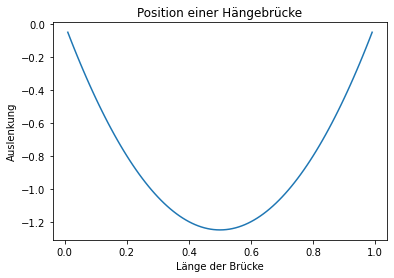

In [9]:
import matplotlib.pyplot as plt
plt.xlabel('Länge der Brücke')
plt.ylabel('Auslenkung')
plt.title('Position einer Hängebrücke')
plt.plot(x_values,u_num);

# Aufgabenteil 6

Wir berechnen die differenzen der symbolischen Lösung an den Punkten die für die numerische Lösung verwendet wurden.

In [10]:
u_sol_values = lambdify(x, u_sol, 'numpy')(x_values)
differenzen = abs(u_num - u_sol_values)

Berechnung der $l^2$-Norm des Fehlers

In [11]:
np.linalg.norm(differenzen)

0.00994987437109096

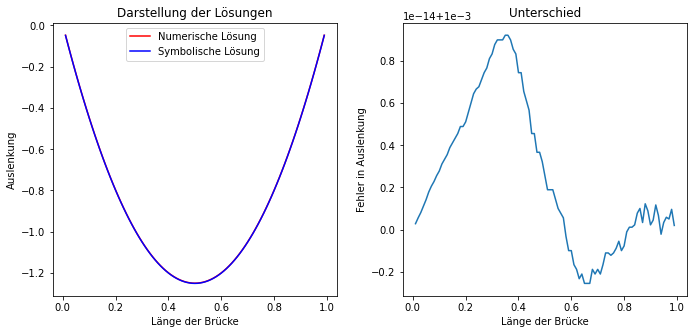

In [12]:
fig = plt.figure()
funktionen = fig.add_subplot(121)
funktionen.plot(x_values, u_num, 'r', label='Numerische Lösung')
funktionen.plot(x_values, u_sol_values, 'b', label='Symbolische Lösung')
funktionen.set_xlabel('Länge der Brücke')
funktionen.set_ylabel('Auslenkung')
funktionen.set_title('Darstellung der Lösungen')
funktionen.legend(loc = 'best');

fehler = fig.add_subplot(122)
fehler.set_title('Unterschied')
fehler.set_xlabel('Länge der Brücke')
fehler.set_ylabel('Fehler in Auslenkung')
fehler.plot(x_values,differenzen)

fig.set_size_inches(10,5)
fig.tight_layout(pad=2.);